# Merge all the cleaned csv files

In [1]:
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '../../../'))
sys.path.append(project_root)

In [3]:
DATA_PATH = os.path.join(
    project_root,
    'nepali_sentiment_analysis',
    'dataset',
    'cleaned'
)

print(os.listdir(DATA_PATH))

['cleaned_neutral_data.csv', 'cleaned_sentiment_analysis_nepali_final.csv', 'cleaned_train_test_neutral_data.csv']


In [4]:
csv_files = [f for f in os.listdir(DATA_PATH) if f.endswith('.csv')]

In [5]:
# Initialize an empty list to hold all the DataFrames
dfs = []

# Loop through each CSV file and load them into DataFrames
for csv_file in csv_files:
    file_path = os.path.join(DATA_PATH, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

In [6]:
# Concatenate all the DataFrames
combined_df = pd.concat(dfs, ignore_index=True)
combined_df.sample(5)

,Sentiment,Sentences
2347,0,भिरकोट नगरपालिका पर्यो
8311,2,देश विकास
3661,0,काठमाण्डाै महानगरमा मेयर सूर्य ३३०० रुख २८६६ ल...
34658,1,यी मन्त्रीहरुले पाए कोभिड रोकथामका लागि प्रदेश...
13003,2,कोभिड अस्पताल धरानमा एक जनाको मृत्यु


In [7]:
print("Info:")
print(combined_df.info())
print("-" * 50)
print("Describe:")
print(combined_df.describe())

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43637 entries, 0 to 43636
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  43637 non-null  int64 
 1   Sentences  43637 non-null  object
dtypes: int64(1), object(1)
memory usage: 682.0+ KB
None
--------------------------------------------------
Describe:
          Sentiment
count  43637.000000
mean       1.026537
std        0.796098
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000


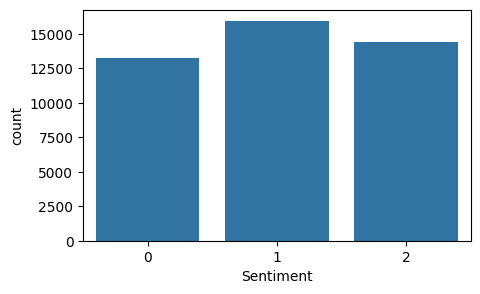

In [8]:
plt.figure(figsize=(5, 3))
sns.countplot(data=combined_df, x='Sentiment')
plt.show()

In [9]:
# check for missing values and duplicates
print("Missing Values:")
print(combined_df.isnull().sum())

print("Duplicates:")
print(combined_df.duplicated().sum())

Missing Values:
Sentiment    0
Sentences    0
dtype: int64
Duplicates:
1


In [10]:
# remove the duplicates 
combined_df.drop_duplicates(inplace=True)

In [11]:
print(combined_df['Sentiment'].value_counts())

Sentiment
1    15951
2    14422
0    13263
Name: count, dtype: int64


In [15]:
# Statistical Analysis of the Sentences column
print("Statistical Analysis of the Sentences column")

combined_df['Sentence Length'] = combined_df['Sentences'].apply(lambda x: len(x.split()))

print(f"Mean Length: {combined_df['Sentence Length'].mean()}")
print(f"Median Length: {combined_df['Sentence Length'].median()}")
print(f"Maximum length: {combined_df['Sentence Length'].max()}")
print(f"Minimum Length: {combined_df['Sentence Length'].min()}")

Statistical Analysis of the Sentences column
Mean Length: 17.329040242002016
Median Length: 14.0
Maximum length: 476
Minimum Length: 1


In [13]:
# remove the sentence length column
combined_df.drop('Sentence Length', axis=1, inplace=True)

In [14]:
PROCESSED_DATA_PATH = os.path.join(
    DATA_PATH,
    '../',
    'processed'
)

OUTPUT_PATH = os.path.join(
    PROCESSED_DATA_PATH,
    'combined_cleaned_data.csv'
)

combined_df.to_csv(os.path.join(OUTPUT_PATH), index=False)

if os.path.exists(os.path.join(OUTPUT_PATH)):
    print("Data saved successfully to: ", OUTPUT_PATH)

Data saved successfully to:  c:\Users\Suyash Shrestha\Personal\_Nepali_news_project\News-algorithm\news_algorithms\nepali_sentiment_analysis\dataset\cleaned\../processed\combined_cleaned_data.csv
